<a href="https://colab.research.google.com/github/Namrahh/breast_cancer_dataset/blob/main/BreastCancerDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Load and Prepare the Data**

We use scikit-learn's breast cancer dataset with 30 numerical features and a binary target.

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)


# **Data Preprocessing**

We scale all features using StandardScaler to improve performance of KNN and SVM.

# **Train-test Split**

In [3]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# **Scale Features**

In [4]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **Train and Evaluate**

We train three models: KNN, Naive Bayes, and SVM. We evaluate them using accuracy, precision, recall, and F1-score.

# **KNN**

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print("KNN Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

KNN Accuracy: 0.9473684210526315
Confusion Matrix:
 [[40  3]
 [ 3 68]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



# **Naive Bayes**

In [6]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred_nb = nb.predict(X_test)

print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))
print("Classification Report:\n", classification_report(y_test, y_pred_nb))

Naive Bayes Accuracy: 0.9649122807017544
Confusion Matrix:
 [[40  3]
 [ 1 70]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



# **SVM**

In [7]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', C=1.0, gamma='scale')  # RBF = default non-linear kernel
svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.9824561403508771
Confusion Matrix:
 [[41  2]
 [ 0 71]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



# **Comparing Model Performance**

In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Store your models and predictions
models = {
    "KNN": y_pred,
    "Naive Bayes": y_pred_nb,
    "SVM": y_pred_svm
}

# Create list to store results
results = []

for model_name, preds in models.items():
    accuracy = accuracy_score(y_test, preds)
    precision = precision_score(y_test, preds, average='weighted')
    recall = recall_score(y_test, preds, average='weighted')
    f1 = f1_score(y_test, preds, average='weighted')

    results.append([model_name, accuracy, precision, recall, f1])

# Create DataFrame
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-score"])
print(results_df)


         Model  Accuracy  Precision    Recall  F1-score
0          KNN  0.947368   0.947368  0.947368  0.947368
1  Naive Bayes  0.964912   0.965205  0.964912  0.964738
2          SVM  0.982456   0.982937  0.982456  0.982369


# **K-Means Clustering**

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [10]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)

# Add cluster labels to DataFrame
X['cluster'] = kmeans.labels_


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

y = data.target
print("Confusion Matrix:\n", confusion_matrix(y, kmeans.labels_))


Confusion Matrix:
 [[175  37]
 [ 13 344]]


| Term                    | Value | Explanation                                         |
| ----------------------- | ----- | --------------------------------------------------- |
| **True Negative (TN)**  | 175   | Model predicted "malignant" correctly               |
| **False Positive (FP)** | 37    | Model predicted "benign" for malignant cases (bad!) |
| **False Negative (FN)** | 13    | Model predicted "malignant" for benign cases        |
| **True Positive (TP)**  | 344   | Model predicted "benign" correctly                  |


# **Visualize clusters with PCA**

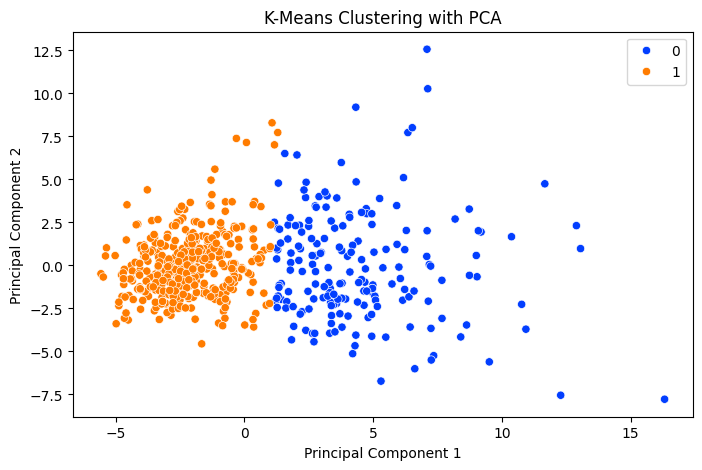

In [12]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

#Plot
plt.figure(figsize=(8,5))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=kmeans.labels_, palette='bright')
plt.title('K-Means Clustering with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split # Import train_test_split

# X_pca contains the reduced features
# Perform train-test split on PCA-transformed data
X_pca_train, X_pca_test, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_pca_train, y_train)

y_pred = model.predict(X_pca_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9824561403508771
